In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r"C:\Users\Nourhan\Documents\Graduation Project\cicids2017_cleaned.csv")
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Attack Type
0,22,1266342,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0.000000,0,0,...,243,0,32,0.0,0,0,0.0,0,0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,110.129945,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0.000000,0,0,...,290,0,32,0.0,0,0,0.0,0,0,Normal Traffic


In [3]:
df.columns = [c.strip().replace(" ", "_") for c in df.columns]
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Length_of_Fwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Max,Active_Min,Idle_Mean,Idle_Max,Idle_Min,Attack_Type
0,22,1266342,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0.000000,0,0,...,243,0,32,0.0,0,0,0.0,0,0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,110.129945,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0.000000,0,0,...,290,0,32,0.0,0,0,0.0,0,0,Normal Traffic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520751 entries, 0 to 2520750
Data columns (total 53 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination_Port             int64  
 1   Flow_Duration                int64  
 2   Total_Fwd_Packets            int64  
 3   Total_Length_of_Fwd_Packets  int64  
 4   Fwd_Packet_Length_Max        int64  
 5   Fwd_Packet_Length_Min        int64  
 6   Fwd_Packet_Length_Mean       float64
 7   Fwd_Packet_Length_Std        float64
 8   Bwd_Packet_Length_Max        int64  
 9   Bwd_Packet_Length_Min        int64  
 10  Bwd_Packet_Length_Mean       float64
 11  Bwd_Packet_Length_Std        float64
 12  Flow_Bytes/s                 float64
 13  Flow_Packets/s               float64
 14  Flow_IAT_Mean                float64
 15  Flow_IAT_Std                 float64
 16  Flow_IAT_Max                 int64  
 17  Flow_IAT_Min                 int64  
 18  Fwd_IAT_Total                int64  
 19  

In [5]:
df.isna().sum()

Destination_Port               0
Flow_Duration                  0
Total_Fwd_Packets              0
Total_Length_of_Fwd_Packets    0
Fwd_Packet_Length_Max          0
Fwd_Packet_Length_Min          0
Fwd_Packet_Length_Mean         0
Fwd_Packet_Length_Std          0
Bwd_Packet_Length_Max          0
Bwd_Packet_Length_Min          0
Bwd_Packet_Length_Mean         0
Bwd_Packet_Length_Std          0
Flow_Bytes/s                   0
Flow_Packets/s                 0
Flow_IAT_Mean                  0
Flow_IAT_Std                   0
Flow_IAT_Max                   0
Flow_IAT_Min                   0
Fwd_IAT_Total                  0
Fwd_IAT_Mean                   0
Fwd_IAT_Std                    0
Fwd_IAT_Max                    0
Fwd_IAT_Min                    0
Bwd_IAT_Total                  0
Bwd_IAT_Mean                   0
Bwd_IAT_Std                    0
Bwd_IAT_Max                    0
Bwd_IAT_Min                    0
Fwd_Header_Length              0
Bwd_Header_Length              0
Fwd_Packet

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination_Port,2520751.0,8.690744e+03,1.901294e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow_Duration,2520751.0,1.659032e+07,3.523140e+07,-1.300000e+01,208.000000,50620.000000,5.332968e+06,1.200000e+08
Total_Fwd_Packets,2520751.0,1.025880e+01,7.943824e+02,1.000000e+00,2.000000,2.000000,6.000000e+00,2.197590e+05
Total_Length_of_Fwd_Packets,2520751.0,6.065243e+02,1.011595e+04,0.000000e+00,12.000000,66.000000,3.320000e+02,1.290000e+07
Fwd_Packet_Length_Max,2520751.0,2.311993e+02,7.563122e+02,0.000000e+00,6.000000,40.000000,2.020000e+02,2.482000e+04
Fwd_Packet_Length_Min,2520751.0,1.920377e+01,6.079887e+01,0.000000e+00,0.000000,2.000000,3.700000e+01,2.325000e+03
Fwd_Packet_Length_Mean,2520751.0,6.350189e+01,1.955512e+02,0.000000e+00,6.000000,36.250000,5.200000e+01,5.940857e+03
Fwd_Packet_Length_Std,2520751.0,7.732029e+01,2.968824e+02,0.000000e+00,0.000000,0.000000,7.419280e+01,7.125597e+03
Bwd_Packet_Length_Max,2520751.0,9.749253e+02,2.038152e+03,0.000000e+00,6.000000,97.000000,7.460000e+02,1.953000e+04
Bwd_Packet_Length_Min,2520751.0,4.316019e+01,7.088017e+01,0.000000e+00,0.000000,0.000000,8.200000e+01,2.896000e+03


# CLEAN NEGATIVE AND CORRUPT VALUES

In [7]:
cols_with_negative = [
    'Flow_Duration', 'Flow_Bytes/s', 'Flow_Packets/s',
    'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
    'Fwd_IAT_Min', 'Fwd_Header_Length', 'Bwd_Header_Length',
    'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'min_seg_size_forward'
]

for col in cols_with_negative:
    if col in df.columns:
        df[col] = df[col].clip(lower=0)   # replaces negative values with 0

# LOG-TRANSFORM EXTREME / HEAVY-TAILED FEATURES

In [8]:
log_features = [
    'Flow_Bytes/s', 'Flow_Packets/s',
    'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
    'Fwd_IAT_Min', 'Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min',
    'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min',
    'Packet_Length_Variance',
    'Total_Length_of_Fwd_Packets', 'Subflow_Fwd_Bytes'
]

for col in log_features:
    if col in df.columns:
        df[col] = np.log1p(df[col])    # log(1 + x)

#  TRAIN/VAL/TEST SPLIT

In [9]:
X = df.drop("Attack_Type", axis=1)
y = df["Attack_Type"]

# 70% train, 15% val, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# SCALING
#    - RobustScaler handles remaining outliers
#    - StandardScaler makes data Gaussian-like for NN

In [10]:

robust = RobustScaler()
standard = StandardScaler()

In [11]:
# 1) Fit robust on train only
X_train_robust = robust.fit_transform(X_train)
X_val_robust   = robust.transform(X_val)
X_test_robust  = robust.transform(X_test)

In [12]:
# 2) Fit StandardScaler on the robust-transformed train
X_train_scaled = standard.fit_transform(X_train_robust)
X_val_scaled   = standard.transform(X_val_robust)
X_test_scaled  = standard.transform(X_test_robust)

In [13]:
print("X_train_scaled:", X_train_scaled.shape)
print("X_val_scaled:",   X_val_scaled.shape)
print("X_test_scaled:",  X_test_scaled.shape)

X_train_scaled: (1764525, 52)
X_val_scaled: (378113, 52)
X_test_scaled: (378113, 52)


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination_Port,2520751.0,8.690744e+03,1.901294e+04,0.0,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow_Duration,2520751.0,1.659032e+07,3.523140e+07,0.0,208.000000,50620.000000,5.332968e+06,1.200000e+08
Total_Fwd_Packets,2520751.0,1.025880e+01,7.943824e+02,1.0,2.000000,2.000000,6.000000e+00,2.197590e+05
Total_Length_of_Fwd_Packets,2520751.0,4.066221e+00,2.275299e+00,0.0,2.564949,4.204693,5.808142e+00,1.637274e+01
Fwd_Packet_Length_Max,2520751.0,2.311993e+02,7.563122e+02,0.0,6.000000,40.000000,2.020000e+02,2.482000e+04
Fwd_Packet_Length_Min,2520751.0,1.920377e+01,6.079887e+01,0.0,0.000000,2.000000,3.700000e+01,2.325000e+03
Fwd_Packet_Length_Mean,2520751.0,6.350189e+01,1.955512e+02,0.0,6.000000,36.250000,5.200000e+01,5.940857e+03
Fwd_Packet_Length_Std,2520751.0,7.732029e+01,2.968824e+02,0.0,0.000000,0.000000,7.419280e+01,7.125597e+03
Bwd_Packet_Length_Max,2520751.0,9.749253e+02,2.038152e+03,0.0,6.000000,97.000000,7.460000e+02,1.953000e+04
Bwd_Packet_Length_Min,2520751.0,4.316019e+01,7.088017e+01,0.0,0.000000,0.000000,8.200000e+01,2.896000e+03


In [15]:
df.dtypes

Destination_Port                 int64
Flow_Duration                    int64
Total_Fwd_Packets                int64
Total_Length_of_Fwd_Packets    float64
Fwd_Packet_Length_Max            int64
Fwd_Packet_Length_Min            int64
Fwd_Packet_Length_Mean         float64
Fwd_Packet_Length_Std          float64
Bwd_Packet_Length_Max            int64
Bwd_Packet_Length_Min            int64
Bwd_Packet_Length_Mean         float64
Bwd_Packet_Length_Std          float64
Flow_Bytes/s                   float64
Flow_Packets/s                 float64
Flow_IAT_Mean                  float64
Flow_IAT_Std                   float64
Flow_IAT_Max                   float64
Flow_IAT_Min                   float64
Fwd_IAT_Total                    int64
Fwd_IAT_Mean                   float64
Fwd_IAT_Std                    float64
Fwd_IAT_Max                      int64
Fwd_IAT_Min                    float64
Bwd_IAT_Total                    int64
Bwd_IAT_Mean                   float64
Bwd_IAT_Std              

In [16]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

(1764525, 52) (378113, 52) (378113, 52)
Attack_Type
Normal Traffic    1466539
DoS                135621
DDoS                89610
Port Scanning       63486
Brute Force          6405
Web Attacks          1500
Bots                 1364
Name: count, dtype: int64
Attack_Type
Normal Traffic    314259
DoS                29062
DDoS               19202
Port Scanning      13604
Brute Force         1372
Web Attacks          322
Bots                 292
Name: count, dtype: int64
Attack_Type
Normal Traffic    314259
DoS                29062
DDoS               19202
Port Scanning      13604
Brute Force         1373
Web Attacks          321
Bots                 292
Name: count, dtype: int64


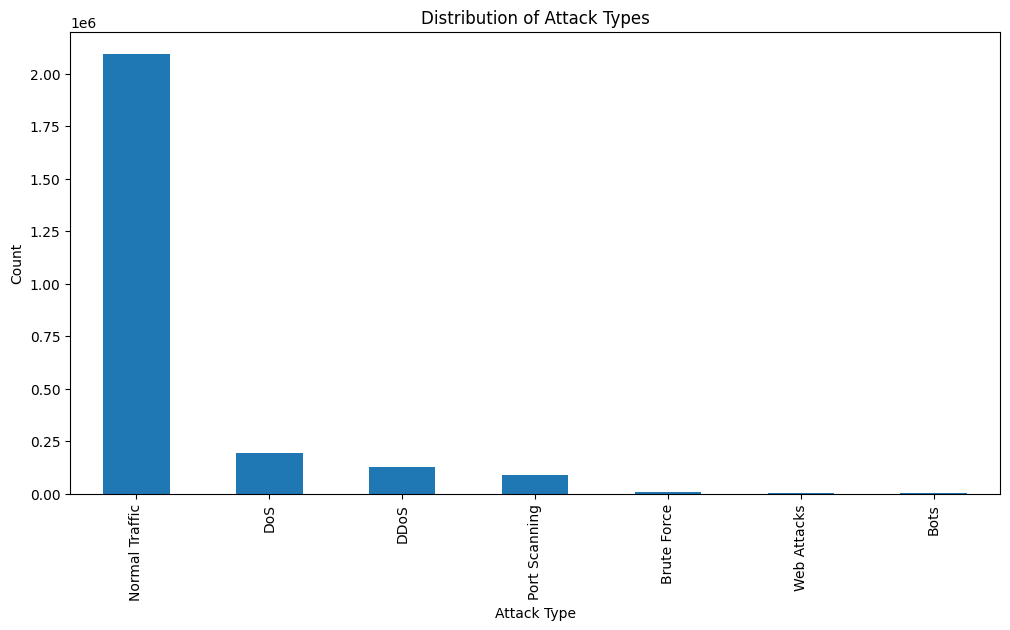

In [17]:
# visualize attack types distribution
attack_counts = df['Attack_Type'].value_counts()
plt.figure(figsize=(12, 6))
attack_counts.plot(kind='bar')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

In [18]:
df['Attack_Type'].unique()

array(['Normal Traffic', 'Port Scanning', 'Web Attacks', 'Brute Force',
       'DDoS', 'Bots', 'DoS'], dtype=object)

In [19]:
# Train on normal traffic only
X_train_oc = X_train[y_train=="Normal Traffic"]

In [20]:
X_train_robust = robust.fit_transform(X_train_oc)
X_train_scaled = standard.fit_transform(X_train_robust)

In [21]:
y_val_bin = np.where(y_val=="Normal Traffic", 1, -1) # 1 for Normal and -1 for Attack
y_test_bin = np.where(y_test=="Normal Traffic", 1, -1)

In [22]:
X_train_oc_scaled = standard.fit_transform(robust.fit_transform(X_train[y_train=="Normal Traffic"]))

In [28]:
# Train only on normal traffic
iso_forest = IsolationForest(
    n_estimators=300,        # number of trees
    max_samples='auto',      # sample size
    contamination=0.10,      # expected proportion of outliers
    random_state=42
)
iso_forest.fit(X_train_oc)

,n_estimators,300
,max_samples,'auto'
,contamination,0.1
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [29]:
# Predict on test set
y_pred = iso_forest.predict(X_test_scaled)  

# Map to original labels for evaluation
y_pred_labels = np.where(y_pred == 1, "Normal Traffic", "Attack")

y_test_binary = np.where(y_test=="Normal Traffic", "Normal Traffic", "Attack")

print(classification_report(y_test_binary, y_pred_labels, zero_division=0))


c:\Users\Nourhan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


                precision    recall  f1-score   support

        Attack       0.00      0.00      0.00     63854
Normal Traffic       0.83      1.00      0.91    314259

      accuracy                           0.83    378113
     macro avg       0.42      0.50      0.45    378113
  weighted avg       0.69      0.83      0.75    378113

